In [2]:
import en_core_web_sm
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pushpalatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pushpalatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Sentimental analysis
df = pd.read_csv("Elon_musk.csv",encoding='latin-1')

In [5]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
df.shape

(1999, 2)

In [7]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [8]:
df['Text']

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [9]:
stp_words=stopwords.words("english")
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Cleaning Tweets
tweet_one = df.iloc[4]["Text"]

In [11]:
def TweetCleaning(tweets):
    cleantweet = re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
    cleantweet = re.sub(r"#[a-zA-Z0-9]+"," ",cleantweet)
    cleantweet=''.join(word for word in cleantweet.split() if word not in stp_words)
    return cleantweet

In [12]:
def calpolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [13]:
def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

In [14]:
def segmentation(tweets):
    if tweets > 0:
        return "positive"
    if tweets== 0:
        return "neutral"
    else:
        return "negative"

In [15]:
df["cleanedtweets"]=df['Text'].apply(TweetCleaning)
df['polarity']=df["cleanedtweets"].apply(calpolarity)
df['subjectivity']=df["cleanedtweets"].apply(calSubjectivity)
df['segmentation']=df["polarity"].apply(segmentation)

In [16]:
df.head()

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,4,@gtera27 Doge is underestimated,Dogeunderestimated,0.0,0.0,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaamazingexecutionlasty...,0.0,0.0,neutral


In [17]:
# Analysis and visualization
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,3
neutral,1914
positive,82


In [18]:
# Top three positive tweets
df.sort_values(by=['polarity'],ascending=False).head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
1594,1595,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,979,@lexfridman Nice,Nice,0.6,1.0,positive
1017,1018,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [19]:
# Top three negative tweets
df.sort_values(by=['polarity'],ascending=True).head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
852,853,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,418,@OLHZN Minor,Minor,-0.05,0.20,negative
741,742,@PPathole Strange,Strange,-0.05,0.15,negative


In [20]:
# Top three neutral tweets
df['polarity']==0
df[df['polarity']==0].head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


In [21]:
df["cleanedtweets"]


0                                                Imalien
1       _AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...
2                                         Greatinterview!
3                                      Dogeunderestimated
4       CongratulationsTeslaChinaamazingexecutionlasty...
                              ...                        
1994    True,soundssurreal,negativepropagandastill&amp...
1995    Makesurereadurterms&amp;conditionsclickingaccept!
1996                                        SamwiseGamgee
1997              AlthoDumbDumber<U+0001F525><U+0001F525>
1998                               ProgressupdateAugust28
Name: cleanedtweets, Length: 1999, dtype: object

In [22]:
# Joining the list into one string/text
text = ' '.join(df["cleanedtweets"])
text

'I\x92malien _AA_CarmackRaytracingCyberpunkHDRnext-level.Havetriedit? Greatinterview! Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyear.Nownextevenmore!! HappyNewYearOx!https://t.co/9WFKMYu2oj Frodounderdoge,Allthoughtwouldfail,Himselfall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelyrepresentreal-worldtimeallocation. Theentertainingoutcomelikely Justsent JustagreeClubhouse https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilX,toddlerhodler Hedefinitelyissues,sentencingseemsbithigh Thanksfixing Pleaseunlockaccount <U+0001F923><U+0001F923> Thistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RT:NASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemission!https://t.co/3pWt Yes _Oncepredictcashflowreasonablywell,StarlinkIPO _Starlinkstaggeringlydifficulttechnical&amp;economicendeavor.However,https://t.co/9Z8Ac6skqx _SpaceXneedspassdeepchasmnegativecashflownextyearhttps://t.co/7J1c9

In [23]:
# Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'I\x92malien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMusts

In [24]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'Dogeunderestimated', 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore', 'HappyNewYearOxhttpstco9WFKMYu2oj', 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'Theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt', 'Yes', 'OncepredictcashflowreasonablywellStarlinkIPO', 'StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx', 'SpaceXneedspassdeepchasmnegativecashflownextyearhttpst

In [25]:
# Removing stopwords
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

In [26]:
# Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])


['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestimated', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathanks', 'indeedtweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'justsent', 'justagreeclubhouse', 'httpstco3rwe9uhsts', 'it\x92sgettingreal', 'boughtdogecoinlilxtoddlerhodler', 'hedefinitelyissuessentencingseemsbithigh', 'thanksfixing', 'pleaseunlockaccount', 'u0001f923u0001f923', 'thistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo', 'starlinkstaggeringlydifficulttechnicalampeconomicendeavorhoweverhttpstco9z8ac6skqx', 'spacexneedspassdeepchasmnegativecashflownextyearhttpst

In [27]:
# Stemming the data
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])

['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestim', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelyrepresentrealworldtimealloc', 'theentertainingoutcomelik']


In [28]:
import spacy
nlp=spacy.load("en_core_web_sm")
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Imalien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS Itsgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwontgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMustscalableght

In [29]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'dogeunderestimate', 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore', 'HappyNewYearOxhttpstco9WFKMYu2oj', 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'u0001f923u0001f923', 'thistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletwon\x92tgiveprivatekeysavoidedcost', 'yourappsuck', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo']


In [30]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)

In [32]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])
print(X.toarray().shape)

{'malien': 846, 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit': 41, 'greatinterview': 528, 'dogeunderestim': 344, 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor': 298, 'happynewyearoxhttpstco9wfkmyu2oj': 558, 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm': 478, 'hahathank': 552, 'indeedtweetsdefinitelyrepresentrealworldtimealloc': 699, 'theentertainingoutcomelik': 1696, 'justsent': 763, 'justagreeclubhous': 754, 'httpstco3rwe9uhst': 603, 'it': 719, 'sgettingr': 1397, 'boughtdogecoinlilxtoddlerhodl': 225, 'hedefinitelyissuessentencingseemsbithigh': 570, 'thanksfix': 1665, 'pleaseunlockaccount': 1071, 'u0001f923u0001f923': 1896, 'thistruepowerhahahttpstcofc9uhqsd7o': 1778, 'anycryptowalletwon': 146, 'tgiveprivatekeysavoidedcost': 1660, 'yourappsuck': 2111, 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt': 1231, 'ye': 2053, 'oncepredictcashflowreasonablywellstarlinkipo': 1026, 'starlinkstaggeringlydifficu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Bigrams and Trigrams 
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df["cleanedtweets"])
bow_matrix_ngram
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f1e9', '0001f1e9 0001f1ea', '0001f1ea', '0001f339', '0001f3b6', '0001f440', '0001f44d', '0001f495', '0001f4af', '0001f525', '0001f525 0001f525', '0001f5a4', '0001f600', '0001f609', '0001f680', '0001f923', '0001f923 0001f923', '0435', '043b', '043e', '100', '200d', '2192', '2192 https', '2192 https co', '2660', '2660 fe0f', '26a1', '26a1 fe0f', '_enoughyes', 'absolutely', 'agreed', 'also', 'amp', 'amp https', 'amp https co', 'buhttps', 'buhttps co', 'but', 'can', 'co', 'comingsoon', 'cool', 'doesn', 'doge', 'don', 'exactly', 'falcon9', 'fe0f', 'forsure', 'goodanalysis', 'goodpoint', 'greatgame', 'gt', 'haha', 'hahatrue', 'hopefully', 'however', 'https', 'https co', 'indeed', 'it', 'liftoff', 'liftoff https', 'liftoff https co', 'long', 'lt', 'no', 'notbad', 'ok', 'prettymuch', 'rt', 'rt falcon9', 'rt https', 'rt https co', 'rt liftoff', 'rt liftoff https', 'rt_crew', 'shttps', 'shttps co', 'sigh', 'sorry', 'spacex', 'sure', 'technically', 'term', 'tesla', 'thankyou', 'that', 'the'

In [34]:
# TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df["cleanedtweets"])
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f923', '0001f923 0001f923', 'amp', 'co', 'https', 'https co', 'it', 'rt', 'we', 'yes']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
# Wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
#%matplotlib inline


In [36]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

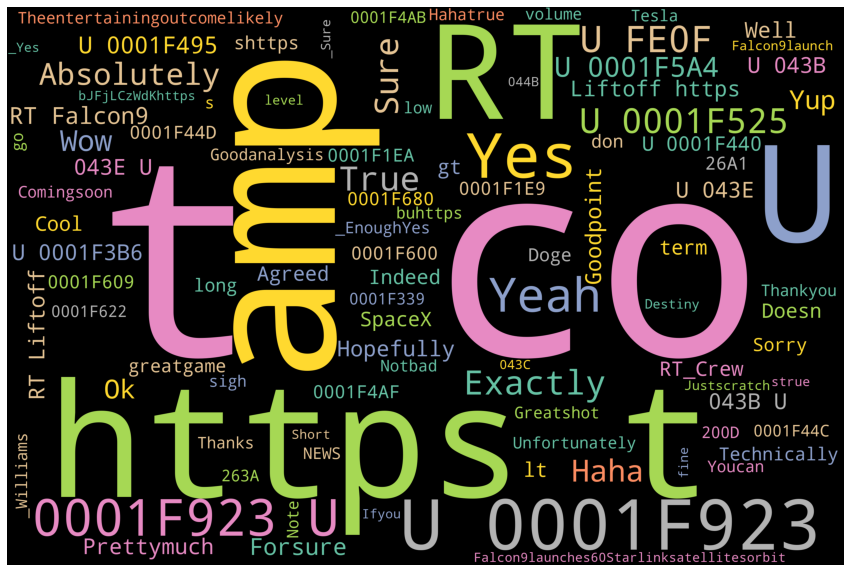

In [37]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(text)
plot_cloud(wordcloud)
plt.show()